# Capstone Week 5

## By Krit Pattamadit

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

**Columbia, Missouri** is the city I spend most of 5 years to complete degree. Columbia is university city  where there are not many types of restaurants or not many types of entertainment area. For Applied Data science project, If I were entrepreneur, I would like to investigate if there any shop should I plan or recommend opening that could help to city. My initial idea finds similar district nearby as reference point and compare to Columbia and suggest what kind of restaurant should it be open.

## Data <a name="data"></a>

The mainly sources would be data gathering for foursquare API, Missouri State consensus data, and Wikipedia of City list in Missouri. Foursquare API mainly source is to attract restaurant data. While other data is to extract as other feature data for clustering process. This is an initial data sources that would be use. These are links that project was used for based line.
* https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/table/
* https://en.wikipedia.org/wiki/List_of_municipalities_in_Missouri

Note Upon Discovery on consensus data. The detail of  Missouri, City Demographic are available for small number.Thus data will limited 

In Summary there are three main sources of data this project will be used as following:
* [City names in Missouri State along with population Consensus](#City)
* [City list along with lattitude and longtitude](#CityLocation)
* [Four Square API](#Foursquare)

##################################################################

In [1]:
## First Let's gather all Libraries and nessesary conponent for computation first
!pip install beautifulsoup4 #install beatifulsoup
!pip install lxml # install csv text
!conda install -c conda-forge geopy --yes # install geopy
!conda install -c conda-forge folium=0.5.0 --yes # install folium

     |████████████████████████████████| 112kB 9.2MB/s eta 0:00:01
     |████████████████████████████████| 5.8MB 8.1MB/s eta 0:00:01
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    numpy-1.18.1               |   py36h95a1406_0         5.2 MB  conda-forge
    liblapacke-3.8.0           |      11_openblas          10 KB  conda-forge
    geographiclib-

In [2]:
import pandas as pd
import requests
import lxml
from bs4 import BeautifulSoup
import numpy as np # library to handle data in a vectorized manner
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt 
# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import folium # map rendering library
import numpy as np 


print('Libraries imported.')

Libraries imported.


### City names in Missouri State along with population Consensus<a name="City"></a>

In [3]:
# Get data for city
# gathering Data from wikipedia by using beautiful soup
req = requests.get("https://en.wikipedia.org/wiki/List_of_municipalities_in_Missouri")
soup = BeautifulSoup(req.content,'html')
table = soup.find_all('table')[0]

#define pandas reader in string from web
df = pd.read_html(str(table))

missouri_city=pd.DataFrame(df[0])

In [4]:
missouri_city.shape

(1025, 4)

In [5]:
missouri_city.head(30)

,City,Type,2010 U.S. Census[1],County
0,Adrian,City,1677,Bates
1,Advance,City,1347,Stoddard
2,Affton,CDP,20307,St. Louis
3,Agency,Village,684,Buchanan
4,Airport Drive,Village,698,Jasper
5,Alba,City,555,Jasper
6,Albany †,City,1730,Gentry
7,Aldrich,Village,80,Polk
8,Alexandria,City,159,Clark
9,Allendale,Village,53,Worth


As you can see There are a lot of city/village/town ( as in Type column) and various number of consensus population number
Also some of City name have cross symbol in the back of data. Also if we take a  look at City with Latitude and Longitude. The city name such as St. Loius and  Saint Loius are different

Thus there is cleaning data in process

In [6]:
# Clean city data
# Clean city with cross symbol, replace Abbreviation and trim space
missouri_city['City'] = missouri_city['City'].replace('\†','',regex=True).replace('St.','Saint',regex=True).apply(lambda x: x.strip())

In [7]:
missouri_city.shape

(1025, 4)

Now, This project would be focus on City Type and I pick top 200 most populated city 

In [8]:
# Filter Data for city
missouri_city_filtered = missouri_city[missouri_city['Type']=='City']

In [9]:
# and top 200 city the have most US censesus
missouri_city_filtered_top_200 = missouri_city_filtered.sort_values('2010 U.S. Census[1]', ascending=False).head(200)

In [10]:
missouri_city_filtered_top_200.head(5)

,City,Type,2010 U.S. Census[1],County
485,Kansas City,City,459787,Jackson
876,Saint Louis,City,319294,Independent City
864,Springfield,City,159498,Greene
462,Independence,City,116830,Jackson
205,Columbia,City,108500,Boone


### City list along with lattitude and longtitude<a name="CityLocation"></a>

In [11]:
# for quick reference, the data will extract from excel file with semi colon separator

## Gather coordinates data 
geo = pd.read_csv('MO_coordinates.csv',sep = ';')

geo.sort_values('City', ascending=False).head(20)

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
1100,65784,Zanoni,MO,36.695557,-92.329490,-6,1,"36.695557,-92.32949"
477,63787,Zalma,MO,37.115431,-90.103920,-6,1,"37.115431,-90.10392"
856,65589,Yukon,MO,37.246525,-91.829760,-6,1,"37.246525,-91.82976"
1193,63882,Wyatt,MO,36.911648,-89.222080,-6,1,"36.911648,-89.22208"
100,63832,Wyatt,MO,36.916675,-89.222096,-6,1,"36.916675,-89.222096"
109,63474,Wyaconda,MO,40.354422,-91.910630,-6,1,"40.354422,-91.91063"
1109,63390,Wright City,MO,38.797388,-91.034680,-6,1,"38.797388,-91.03468"
619,63567,Worthington,MO,40.411635,-92.691130,-6,1,"40.411635,-92.69113"
1046,64499,Worth,MO,40.402118,-94.440240,-6,1,"40.402118,-94.44024"
676,65287,Wooldridge,MO,38.884926,-92.521880,-6,1,"38.884926,-92.52188"


There are diffent ZIP code but it's in the same city. so There's a summary in each city name with find average in coordination

In [12]:
geo_sum = geo.groupby('City', as_index=False)['Latitude','Longitude'].mean()
geo_sum.head()

,City,Latitude,Longitude
0,Adrian,38.403880,-94.34512
1,Advance,37.101789,-89.91359
2,Agency,39.627397,-94.72215
3,Alba,37.236623,-94.42087
4,Albany,40.247423,-94.33216


Now, merge city names and city coordinated

In [13]:
### Merge Coordinated and selected City
mergedf = missouri_city_filtered_top_200.join(geo_sum.set_index('City'), on='City')
missouri_data = mergedf[mergedf.Latitude.notnull()].reset_index()
missouri_data.shape

(148, 7)

In [14]:
missouri_data.head(5)

,index,City,Type,2010 U.S. Census[1],County,Latitude,Longitude
0,485,Kansas City,City,459787,Jackson,39.095394,-94.497847
1,876,Saint Louis,City,319294,Independent City,38.643335,-90.289811
2,864,Springfield,City,159498,Greene,37.253954,-93.269458
3,462,Independence,City,116830,Jackson,38.812911,-93.964082
4,205,Columbia,City,108500,Boone,38.940322,-92.236863


### Four Square API<a name="Foursquare"></a>

In [15]:
# @hidden_cell
CLIENT_ID = 'ZXMPI0GQHYFU44ZSMA510L2B112LHIUL4V5D0NMLMTBWSJGE' # your Foursquare ID
CLIENT_SECRET = 'DVVI3UDWNAFPI2MEZRZNNMWCA1ABL1R42FE5RRKEVGFV01KQ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ZXMPI0GQHYFU44ZSMA510L2B112LHIUL4V5D0NMLMTBWSJGE
CLIENT_SECRET:DVVI3UDWNAFPI2MEZRZNNMWCA1ABL1R42FE5RRKEVGFV01KQ


In [16]:
address = 'Missouri, USA'

geolocator = Nominatim(user_agent="tc_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Missouri, USA are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Missouri, USA are 38.7604815, -92.5617875.


In [17]:
# create map of Toronto using latitude and longitude values
map_missouri = folium.Map(location=[latitude, longitude], zoom_start=7)

# add markers to map
for lat, lng, County, City in zip(missouri_data['Latitude'], missouri_data['Longitude'], missouri_data['County'], missouri_data['City']):
    label = '{}, {}'.format(City, County)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_missouri)  
    
map_missouri

##################################################################

## Methodology <a name="methodology"></a>

For the methodology approach, is to clustering city into similiarity group to find City simiiarity pattern on **restuarant type** 

Since the dataset limited as following:
* Clustering City is involved only in Missouri State with top 200 most populated city
* Restaurants need to be fetched within 5km from  central of each city
* Also for clustering model will be use K-mean model using restaurant type ratio in each city

After Clustering result, we will be focus clustering group model that have Columbia city lied on to find group behaviour of restaurant type. Then compare with Columbia data to find the restaurant type that Columbia lack as  a recommended restauarant type that should be open in columbia.

##################################################################

### Extract foursquare API data for only restuarant type

In [18]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [19]:
# function for gather nearby Venues from interesting point 
def getNearbyVenues(names, latitudes, longitudes, radius=10000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
        #print(lat)
        #print(lng)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?categoryId=4d4b7105d754a06374d81259&client_id={}&client_secret={}&ll={},{}&limit={}&radius={}&v=20170901'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            lat, 
            lng, 
            LIMIT, 
            radius)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [20]:
LIMIT = 300
missouri_venues = getNearbyVenues(names=missouri_data['City'],
                                   latitudes=missouri_data['Latitude'],
                                   longitudes=missouri_data['Longitude']
                                  )

In [21]:
print (missouri_venues.shape)
missouri_venues.head(40)

(5681, 7)


,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Kansas City,39.095394,-94.497847,Vivilore,39.087602,-94.449800,American Restaurant
1,Kansas City,39.095394,-94.497847,Steam Bowl,39.105027,-94.522495,Chinese Restaurant
2,Kansas City,39.095394,-94.497847,Elvira's Pasteleria,39.106096,-94.535963,Mexican Restaurant
3,Kansas City,39.095394,-94.497847,Happy Gillis Cafe & Hangout,39.108916,-94.570382,Sandwich Place
4,Kansas City,39.095394,-94.497847,Garozzo's Ristorante,39.109492,-94.571955,Italian Restaurant
5,Kansas City,39.095394,-94.497847,Gates Bar-B-Q,39.098435,-94.555813,BBQ Joint
6,Kansas City,39.095394,-94.497847,Cafe Verona,39.092208,-94.417490,Italian Restaurant
7,Kansas City,39.095394,-94.497847,A Little BBQ Joint,39.101690,-94.428947,BBQ Joint
8,Kansas City,39.095394,-94.497847,Vietnam Cafe,39.109306,-94.573173,Vietnamese Restaurant
9,Kansas City,39.095394,-94.497847,Dixon's Chili,39.059371,-94.471833,American Restaurant


In [22]:
print('There are {} uniques Venue categories.'.format(len(missouri_venues['Venue Category'].unique())))
len(missouri_venues)

There are 75 uniques Venue categories.


5681

In [47]:
# bar plot data on frequency type of venue category
missouri_venues_count = missouri_venues.groupby('Venue Category').count()['City'].rename(columns={"City": "Count"})
#ax = missouri_venues_count.plot.bar(y='Count', rot=90, figsize = [300,250])
missouri_venues_count.sort_values(ascending = False)

Venue Category
Fast Food Restaurant               812
Pizza Place                        763
American Restaurant                541
Sandwich Place                     502
Mexican Restaurant                 469
Chinese Restaurant                 230
Italian Restaurant                 224
BBQ Joint                          189
Breakfast Spot                     183
Steakhouse                         139
Bakery                             138
Burger Joint                       130
Restaurant                         129
Fried Chicken Joint                105
Café                                98
Food                                95
Diner                               91
Donut Shop                          83
Sushi Restaurant                    67
Seafood Restaurant                  63
Thai Restaurant                     61
Asian Restaurant                    53
Deli / Bodega                       49
Wings Joint                         34
Japanese Restaurant                 28
Indian Res

### Clutering model

In [24]:
# one hot encoding
missouri_onehot = pd.get_dummies(missouri_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
missouri_onehot['City'] = missouri_venues['City'] 

# move neighborhood column to the first column
fixed_columns = [missouri_onehot.columns[-1]] + list(missouri_onehot.columns[:-1])
missouri_onehot = missouri_onehot[fixed_columns]

missouri_onehot.head(20)

,City,American Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Brazilian Restaurant,Breakfast Spot,Buffet,Burger Joint,Burrito Place,Cafeteria,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Deli / Bodega,Diner,Donut Shop,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fondue Restaurant,Food,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Greek Restaurant,Hot Dog Joint,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mongolian Restaurant,New American Restaurant,Noodle House,Peruvian Restaurant,Pizza Place,Poke Place,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Snack Place,Soup Place,Southern / Soul Food Restaurant,Steakhouse,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Truck Stop,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,Kansas City,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Kansas City,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Kansas City,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Kansas City,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Kansas City,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Kansas City,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Kansas City,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Kansas City,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Kansas City,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,Kansas City,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
# Group mean count Category Venue
missouri_grouped = missouri_onehot.groupby('City').mean().reset_index()
missouri_grouped.head()

,City,American Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Brazilian Restaurant,Breakfast Spot,Buffet,Burger Joint,Burrito Place,Cafeteria,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Deli / Bodega,Diner,Donut Shop,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fondue Restaurant,Food,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Greek Restaurant,Hot Dog Joint,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mongolian Restaurant,New American Restaurant,Noodle House,Peruvian Restaurant,Pizza Place,Poke Place,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Snack Place,Soup Place,Southern / Soul Food Restaurant,Steakhouse,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Truck Stop,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,Arnold,0.071429,0.0,0.010204,0.0,0.020408,0.00,0.05102,0.0,0.0,0.030612,0.0,0.020408,0.0,0.0,0.010204,0.00,0.0,0.030612,0.0,0.030612,0.010204,0.030612,0.0,0.0,0.0,0.153061,0.0,0.0,0.00,0.010204,0.0,0.0,0.00,0.00,0.020408,0.0,0.0,0.010204,0.0,0.00,0.0,0.061224,0.0,0.00,0.0,0.00,0.081633,0.00,0.0,0.0,0.0,0.0,0.142857,0.00,0.0,0.0,0.0,0.020408,0.0,0.112245,0.00,0.000000,0.00,0.0,0.010204,0.010204,0.0,0.0,0.0,0.010204,0.020408,0.0,0.0,0.00,0.020408
1,Ashland,0.111111,0.0,0.000000,0.0,0.000000,0.00,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.111111,0.0,0.0,0.00,0.111111,0.0,0.0,0.00,0.00,0.000000,0.0,0.0,0.000000,0.0,0.00,0.0,0.000000,0.0,0.00,0.0,0.00,0.000000,0.00,0.0,0.0,0.0,0.0,0.333333,0.00,0.0,0.0,0.0,0.000000,0.0,0.222222,0.00,0.111111,0.00,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00,0.000000
2,Aurora,0.071429,0.0,0.000000,0.0,0.000000,0.00,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00,0.0,0.000000,0.0,0.000000,0.142857,0.000000,0.0,0.0,0.0,0.214286,0.0,0.0,0.00,0.214286,0.0,0.0,0.00,0.00,0.000000,0.0,0.0,0.000000,0.0,0.00,0.0,0.000000,0.0,0.00,0.0,0.00,0.142857,0.00,0.0,0.0,0.0,0.0,0.071429,0.00,0.0,0.0,0.0,0.000000,0.0,0.142857,0.00,0.000000,0.00,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00,0.000000
3,Ava,0.142857,0.0,0.142857,0.0,0.000000,0.00,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.428571,0.0,0.0,0.00,0.000000,0.0,0.0,0.00,0.00,0.000000,0.0,0.0,0.000000,0.0,0.00,0.0,0.000000,0.0,0.00,0.0,0.00,0.000000,0.00,0.0,0.0,0.0,0.0,0.142857,0.00,0.0,0.0,0.0,0.000000,0.0,0.142857,0.00,0.000000,0.00,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00,0.000000
4,Ballwin,0.080000,0.0,0.020000,0.0,0.040000,0.01,0.03000,0.0,0.0,0.030000,0.0,0.020000,0.0,0.0,0.000000,0.01,0.0,0.040000,0.0,0.030000,0.000000,0.010000,0.0,0.0,0.0,0.030000,0.0,0.0,0.01,0.000000,0.0,0.0,0.01,0.02,0.000000,0.0,0.0,0.010000,0.0,0.03,0.0,0.110000,0.0,0.01,0.0,0.01,0.060000,0.01,0.0,0.0,0.0,0.0,0.080000,0.01,0.0,0.0,0.0,0.020000,0.0,0.070000,0.01,0.020000,0.01,0.0,0.070000,0.040000,0.0,0.0,0.0,0.010000,0.020000,0.0,0.0,0.01,0.000000


In [26]:
missouri_grouped_clustering = missouri_grouped.drop('City', 1)

To find suitable of value K we using distortion and inertias to find sharp turn to find suitable K mean

In [27]:
distortions = []
inertias = [] 
K = range(1,20) 

for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k,random_state=0).fit(missouri_grouped_clustering) 
    kmeanModel.fit(missouri_grouped_clustering)     
      
    distortions.append(sum(np.min(cdist(missouri_grouped_clustering, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / missouri_grouped_clustering.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
    

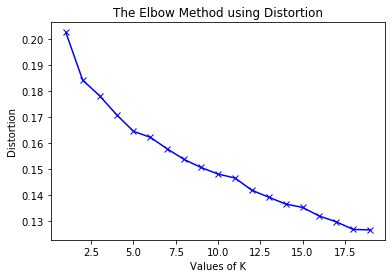

In [28]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

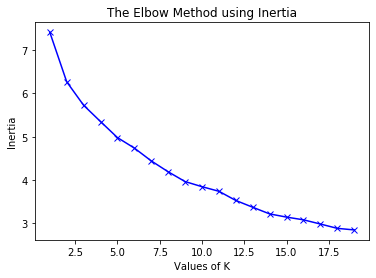

In [29]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

For testing K value the more of K, the more distortion and intertia will make progress but the sharp point when K around 12. Thus This project will categoried into 12 clusters

In [30]:
# set number of clusters
kclusters = 12

# run k-means clustering
kmeansmodel = KMeans(n_clusters=kclusters, random_state=0).fit(missouri_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeansmodel.labels_[0:10] 

array([10,  5,  9,  2,  1, 10,  2,  1,  4,  2], dtype=int32)

In [31]:
# function print top X most Venue Category search within neigbour
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [32]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['City'] = missouri_grouped['City']

for ind in np.arange(missouri_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(missouri_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arnold,Fast Food Restaurant,Pizza Place,Sandwich Place,Mexican Restaurant,American Restaurant,Italian Restaurant,Bakery,Breakfast Spot,Chinese Restaurant,Deli / Bodega
1,Ashland,Pizza Place,Sandwich Place,Food,Snack Place,American Restaurant,Fast Food Restaurant,Food Court,Food Stand,Fondue Restaurant,Fish & Chips Shop
2,Aurora,Fast Food Restaurant,Food,Diner,Sandwich Place,Mexican Restaurant,Pizza Place,American Restaurant,Fondue Restaurant,Fish & Chips Shop,Filipino Restaurant
3,Ava,Fast Food Restaurant,American Restaurant,Pizza Place,Asian Restaurant,Sandwich Place,Diner,Donut Shop,English Restaurant,Ethiopian Restaurant,Falafel Restaurant
4,Ballwin,Italian Restaurant,American Restaurant,Pizza Place,Sandwich Place,Steakhouse,Mexican Restaurant,Chinese Restaurant,BBQ Joint,Sushi Restaurant,Indian Restaurant


In [33]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeansmodel.labels_)

missouri_merged = missouri_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
missouri_merged_final = missouri_merged.join(neighborhoods_venues_sorted.set_index('City'), on='City', how= 'right')

missouri_merged_final.head() # check the last columns!

,index,City,Type,2010 U.S. Census[1],County,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,485,Kansas City,City,459787,Jackson,39.095394,-94.497847,1,American Restaurant,BBQ Joint,Mexican Restaurant,Italian Restaurant,Burger Joint,Sandwich Place,New American Restaurant,Pizza Place,Breakfast Spot,Restaurant
1,876,Saint Louis,City,319294,Independent City,38.643335,-90.289811,1,Italian Restaurant,American Restaurant,Pizza Place,Sandwich Place,Café,Taco Place,Seafood Restaurant,Bakery,Chinese Restaurant,Diner
2,864,Springfield,City,159498,Greene,37.253954,-93.269458,1,Fast Food Restaurant,Sandwich Place,Mexican Restaurant,Pizza Place,American Restaurant,Breakfast Spot,Chinese Restaurant,Bakery,Café,Italian Restaurant
3,462,Independence,City,116830,Jackson,38.812911,-93.964082,3,Portuguese Restaurant,Mexican Restaurant,Food,Deli / Bodega,Diner,Donut Shop,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant
4,205,Columbia,City,108500,Boone,38.940322,-92.236863,1,Pizza Place,American Restaurant,Sandwich Place,Mexican Restaurant,Fast Food Restaurant,BBQ Joint,Burger Joint,Bakery,Fried Chicken Joint,Sushi Restaurant


##################################################################

## Analysis <a name="analysis"></a>

After Gathering nessesary information from Foursquare API, we have to clean and aggregate data for preparing for clustering model

For Cleaning, and aggregation process, we extract all potential restaurant type the from api. Then we summarized by city and find restaurant type ratio for analysis

Before Apply with k-mean analysis, the project will use elbow method to find suitable of  K for clustering process. Which it found out that i should recommend around K =12 based on distortion value

When apply K-mean model to data, now it can focus on  City Columbia and find similiarity of restaurant type, and find lacking type ( could be found by other type of restaurant or restaurant in Columbia is lacking. In this case, it find average value with restaurant type before compare value of Columbia city.


##################################################################

### Find Clustering model mapping

In [34]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=7)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(missouri_merged_final['Latitude'], missouri_merged_final['Longitude'], missouri_merged_final['City'], missouri_merged_final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Let's look cluster of data that have columbia city

In [35]:
missouri_merged_final[missouri_merged_final['City']=='Columbia']

,index,City,Type,2010 U.S. Census[1],County,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,205,Columbia,City,108500,Boone,38.940322,-92.236863,1,Pizza Place,American Restaurant,Sandwich Place,Mexican Restaurant,Fast Food Restaurant,BBQ Joint,Burger Joint,Bakery,Fried Chicken Joint,Sushi Restaurant


In [43]:
Columbia_cluster = missouri_merged_final[missouri_merged_final['Cluster Labels']==1]

print (Columbia_cluster.shape)
Columbia_cluster.head(25)

(25, 18)


,index,City,Type,2010 U.S. Census[1],County,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,485,Kansas City,City,459787,Jackson,39.095394,-94.497847,1,American Restaurant,BBQ Joint,Mexican Restaurant,Italian Restaurant,Burger Joint,Sandwich Place,New American Restaurant,Pizza Place,Breakfast Spot,Restaurant
1,876,Saint Louis,City,319294,Independent City,38.643335,-90.289811,1,Italian Restaurant,American Restaurant,Pizza Place,Sandwich Place,Café,Taco Place,Seafood Restaurant,Bakery,Chinese Restaurant,Diner
2,864,Springfield,City,159498,Greene,37.253954,-93.269458,1,Fast Food Restaurant,Sandwich Place,Mexican Restaurant,Pizza Place,American Restaurant,Breakfast Spot,Chinese Restaurant,Bakery,Café,Italian Restaurant
4,205,Columbia,City,108500,Boone,38.940322,-92.236863,1,Pizza Place,American Restaurant,Sandwich Place,Mexican Restaurant,Fast Food Restaurant,BBQ Joint,Burger Joint,Bakery,Fried Chicken Joint,Sushi Restaurant
6,866,Saint Charles,City,65794,St. Charles,38.720464,-90.643052,1,Fast Food Restaurant,American Restaurant,Sandwich Place,Mexican Restaurant,Italian Restaurant,Pizza Place,Burger Joint,Breakfast Spot,Chinese Restaurant,Donut Shop
7,97,Blue Springs,City,52575,Jackson,38.999563,-94.308882,1,Pizza Place,Mexican Restaurant,American Restaurant,Sandwich Place,Breakfast Spot,Fast Food Restaurant,Chinese Restaurant,BBQ Joint,Steakhouse,Asian Restaurant
8,879,Saint Peters,City,52575,St. Charels,38.778579,-90.620450,1,American Restaurant,Pizza Place,Fast Food Restaurant,Mexican Restaurant,Sandwich Place,Breakfast Spot,Italian Restaurant,Chinese Restaurant,Donut Shop,Burger Joint
11,180,Chesterfield,City,47484,St. Louis,38.644107,-90.532616,1,Mexican Restaurant,Sandwich Place,Italian Restaurant,American Restaurant,Thai Restaurant,Breakfast Spot,Pizza Place,Steakhouse,Fast Food Restaurant,Bakery
14,52,Ballwin,City,30404,St. Louis,38.613573,-90.484374,1,Italian Restaurant,American Restaurant,Pizza Place,Sandwich Place,Steakhouse,Mexican Restaurant,Chinese Restaurant,BBQ Joint,Sushi Restaurant,Indian Restaurant
15,553,Liberty,City,29149,Clay,39.270639,-94.411875,1,Pizza Place,Breakfast Spot,Sandwich Place,Mexican Restaurant,American Restaurant,Burger Joint,Chinese Restaurant,Fast Food Restaurant,Bakery,Deli / Bodega


Find Group details what's average type food store they open

In [41]:
missouri_grouped.insert(0, 'Cluster Labels', kmeansmodel.labels_)
Columbia_cluster_data = missouri_grouped[missouri_grouped['Cluster Labels']==1]
Columbia_cluster_data_sum = Columbia_cluster_data.groupby('Cluster Labels', as_index=False).mean()
Columbia_cluster_data_sum.head()

,Cluster Labels,American Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Brazilian Restaurant,Breakfast Spot,Buffet,Burger Joint,Burrito Place,Cafeteria,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Deli / Bodega,Diner,Donut Shop,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fondue Restaurant,Food,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Greek Restaurant,Hot Dog Joint,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mongolian Restaurant,New American Restaurant,Noodle House,Peruvian Restaurant,Pizza Place,Poke Place,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Snack Place,Soup Place,Southern / Soul Food Restaurant,Steakhouse,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Truck Stop,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,1,0.090223,0.0004,0.01186,0.0,0.044171,0.0028,0.033739,0.0012,0.0016,0.05122,0.002088,0.03274,0.0008,0.0,0.016662,0.003688,0.0016,0.028974,0.0016,0.013081,0.025913,0.019674,0.0008,0.0008,0.0012,0.063235,0.0,0.0,0.002,0.003643,0.001674,0.0004,0.004,0.0068,0.012409,0.005541,0.0008,0.006681,0.0012,0.009941,0.001688,0.060911,0.009556,0.0064,0.0,0.004218,0.087716,0.0032,0.0004,0.005688,0.003674,0.0004,0.086544,0.0012,0.0004,0.0,0.0012,0.021725,0.0008,0.070779,0.016451,0.006088,0.0004,0.0016,0.041706,0.020341,0.005288,0.0004,0.0036,0.003688,0.016207,0.0004,0.0012,0.0028,0.008177


Now we can compare with Columbia Food restaurant type

In [42]:
missouri_grouped[missouri_grouped['City']=='Columbia']

,Cluster Labels,City,American Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Brazilian Restaurant,Breakfast Spot,Buffet,Burger Joint,Burrito Place,Cafeteria,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Deli / Bodega,Diner,Donut Shop,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fondue Restaurant,Food,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Greek Restaurant,Hot Dog Joint,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mongolian Restaurant,New American Restaurant,Noodle House,Peruvian Restaurant,Pizza Place,Poke Place,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Snack Place,Soup Place,Southern / Soul Food Restaurant,Steakhouse,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Truck Stop,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
33,1,Columbia,0.13,0.0,0.0,0.0,0.04,0.01,0.03,0.0,0.0,0.01,0.01,0.04,0.0,0.0,0.01,0.0,0.0,0.01,0.0,0.01,0.02,0.02,0.0,0.0,0.01,0.05,0.0,0.0,0.0,0.0,0.0,0.01,0.01,0.0,0.03,0.02,0.01,0.0,0.0,0.01,0.0,0.01,0.02,0.0,0.0,0.0,0.07,0.01,0.01,0.0,0.01,0.0,0.15,0.0,0.01,0.0,0.0,0.01,0.01,0.11,0.0,0.0,0.0,0.0,0.03,0.03,0.0,0.0,0.0,0.01,0.01,0.0,0.0,0.0,0.01


##################################################################

## Results and Discussions <a name="results"></a>

For City in Missouri State top 168 populated City, There are 5681 restaurants with 75 unique category Venues. The common venue are Fast Food restaurants, American Restaurants, and pizza place.

With data scarping from four squared API we are limited search due to this criteria
* Searching is limited to any food related store
* The search are based on centroid point from ZIP code that have same city name
* radius for searching grid within 10 kilometers from centroid
* in each city, the limited results would be around 400 max search data per city

The result of analysis shows that for K-mean model. By using Elbow method to determine suitable number K for clustering algorithm, the suitable number is 12. When apply the k-mean we found out there are 25 city the have similiar trait like  Columbia city.

We also discover that the common restaurant are usually open in Columbia Pizza Place,American Restaurant and Sandwich Place. Since there are many competitors are in Columbia, These type of restaurant are should be avoid.

As we compare between normalized of  Columbia group cluster data, there are some recommend that type restaurant shop open such as Brazilian, Caribbean, Asian or French restaurants. Since the data indicated that Columbia these type of restaurant are lacking

However, upon comparing the result there are multiple topics in order to improve data quality and improve model as approach as following
* 1. Foursquare API - instead using latitude and  longtitude as the criteria searching, there are might need to searching via searching area instead. Also there are limited search, these could be increase maximum search and increase radius of city
* 2. Modeling - the data for modeling use only restaurant type ratio as a feature for clustering model. For improvement, it could include data such as city demographic, restaurant reviews, or include other type of building beside restaurant to find additional factors

## Conclusion <a name="conclustion"></a>

Purpose of this project was to find which type of restaurant that likely could open the new one. By grouping pattern restaurant type compare with nearby city in the state. it found out the there are around 18 city that similiar to Columbia. When upon find detail of the group there are some interesting shop that Columbia didn't open but there are available to other similiar city such as BBQ shop. Thus this would are guideline to help exploration by stakeholders to found new venture.

However this project could be improve since the main factor analysis is mainly on the restaurant type. it could expand in numerous way such as finding entertain venue pattern as well or expand search radius to nearby State to find interesting pattern. Also there could be more topics to find data for analysis